In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
#Reading our data from yahoo finance

df= yf.download('BCSVX BUFHX MSMLX PRISX PTIAX QUSIX SIUSX FSPTX',start='2016-10-01', end='2021-10-01')
df.head()

[*********************100%***********************]  8 of 8 completed


Adj Close                                                       \
                BCSVX     BUFHX     FSPTX      MSMLX      PRISX      PTIAX   
Date                                                                         
2016-09-30  10.974317  8.125958  7.020283  14.785802  15.401783  17.662300   
2016-10-03  11.047540  8.133088  7.007812  14.849532  15.301676  17.662300   
2016-10-04  11.056692  8.140218  7.003655  14.920347  15.330276  17.631466   
2016-10-05  11.056692  8.147343  7.035350  14.941588  15.473285  17.616058   
2016-10-06  10.946856  8.140218  7.038989  14.948670  15.423232  17.600653   

                                  Close         ...   Open            Volume  \
                QUSIX      SIUSX  BCSVX  BUFHX  ...  QUSIX      SIUSX  BCSVX   
Date                                            ...                            
2016-09-30  10.552435  15.332007  11.99  11.40  ...  12.82  18.549999      0   
2016-10-03  10.601825  15.332007  12.07  11.41  ...  12.88  18.549999      0   
2016-10-04  10.634749  15.290682  12.08  11.42  ...  12.92  18.500000      0   
2016-10-05  10.585361  15.282407  12.08  11.43  ...  12.86  18.490000      0   
2016-10-06  10.527742  15.265882  11.96  11.42  ...  12.79  18.469999      0   

                                                      
           BUFHX FSPTX MSMLX PRISX PTIAX QUSIX SIUSX  
Date                                                  
2016-09-30     0     0     0     0     0     0     0  
2016-10-03     0     0     0     0     0     0     0  
2016-10-04     0     0     0     0     0     0     0  
2016-10-05     0     0     0     0     0     0     0  
2016-10-06     0     0     0     0     0     0     0  

[5 rows x 48 columns]

In [3]:
# Closing price
df = df['Adj Close']
df.head()

,BCSVX,BUFHX,FSPTX,MSMLX,PRISX,PTIAX,QUSIX,SIUSX
Date,,,,,,,,
2016-09-30,10.974317,8.125958,7.020283,14.785802,15.401783,17.662300,10.552435,15.332007
2016-10-03,11.047540,8.133088,7.007812,14.849532,15.301676,17.662300,10.601825,15.332007
2016-10-04,11.056692,8.140218,7.003655,14.920347,15.330276,17.631466,10.634749,15.290682
2016-10-05,11.056692,8.147343,7.035350,14.941588,15.473285,17.616058,10.585361,15.282407
2016-10-06,10.946856,8.140218,7.038989,14.948670,15.423232,17.600653,10.527742,15.265882


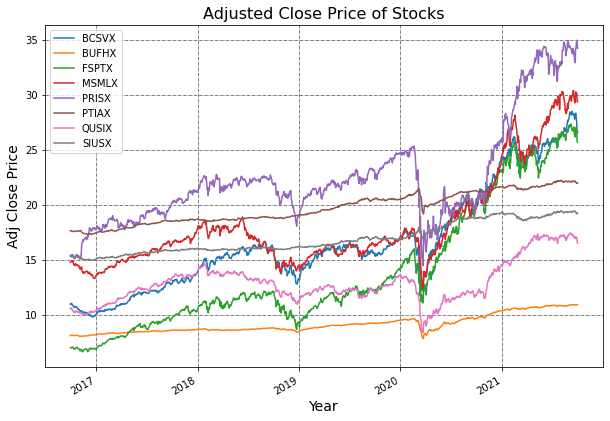

In [4]:
# Plot the adjusted close price
df.plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of Stocks" % df, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

<AxesSubplot:title={'center':'Stocks daily returns'}, xlabel='Date'>

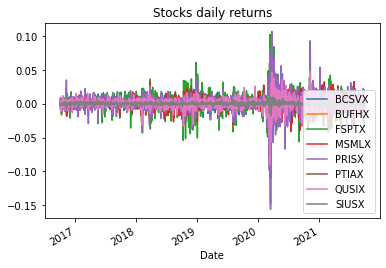

In [5]:
#converting to returns
# Log of percentage change of all stocks in the list
Ret= df.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()
#price series are converted into return.
Ret.plot(title='Stocks daily returns')

In [6]:
#expected return will be calcuated using average of return
#get rid of first line
#mean - expected return

Ann_Ret = Ret.mean()*252
print (Ann_Ret)


#generally the data are in daily so it needs to annualised
#average expected return of FSPTX over the time period is 11.6%, FSPTX is 25.5%

BCSVX    0.177807
BUFHX    0.059278
FSPTX    0.259956
MSMLX    0.137736
PRISX    0.160016
PTIAX    0.043772
QUSIX    0.089777
SIUSX    0.045309
dtype: float64


In [7]:

#sigma - standard deviation, risk
Ann_Risk = Ret.std()*(252)**(0.5) 
print(Ann_Risk)

BCSVX    0.152305
BUFHX    0.046002
FSPTX    0.246329
MSMLX    0.170874
PRISX    0.235281
PTIAX    0.028828
QUSIX    0.138573
SIUSX    0.034760
dtype: float64


In [8]:
assets = pd.concat([Ann_Ret, Ann_Risk], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Ann_Ret', 'Ann_Risk']
assets

,Ann_Ret,Ann_Risk
BCSVX,0.177807,0.152305
BUFHX,0.059278,0.046002
FSPTX,0.259956,0.246329
MSMLX,0.137736,0.170874
PRISX,0.160016,0.235281
PTIAX,0.043772,0.028828
QUSIX,0.089777,0.138573
SIUSX,0.045309,0.034760


In [9]:

rf = 0.03 # risk factor
sharp_ratio = (assets['Ann_Ret']-rf)/assets['Ann_Risk']

sharp_ratio

BCSVX    0.970471
BUFHX    0.636452
FSPTX    0.933534
MSMLX    0.630499
PRISX    0.552600
PTIAX    0.477723
QUSIX    0.431380
SIUSX    0.440427
dtype: float64

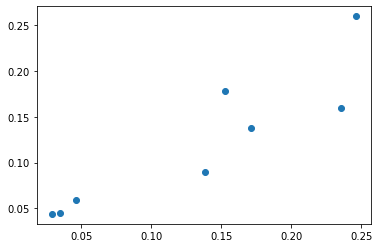

In [10]:
x = Ann_Risk # RISK
y = Ann_Ret # Return
plt.scatter(x, y)
plt.show()

#this is my selection. on a return by risk 

In [21]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BCSVX,BUFHX,FSPTX,MSMLX,PRISX,PTIAX,QUSIX,SIUSX
BCSVX,1.000000,0.608302,0.598051,0.619850,0.429509,0.041941,0.668953,-0.003412
BUFHX,0.608302,1.000000,0.594805,0.565171,0.673689,0.254806,0.647102,0.022160
FSPTX,0.598051,0.594805,1.000000,0.668757,0.635495,-0.054730,0.367214,-0.116751
MSMLX,0.619850,0.565171,0.668757,1.000000,0.572509,0.005786,0.568903,-0.069944
PRISX,0.429509,0.673689,0.635495,0.572509,1.000000,-0.139606,0.525511,-0.295772
PTIAX,0.041941,0.254806,-0.054730,0.005786,-0.139606,1.000000,0.035484,0.728762
QUSIX,0.668953,0.647102,0.367214,0.568903,0.525511,0.035484,1.000000,-0.075074
SIUSX,-0.003412,0.022160,-0.116751,-0.069944,-0.295772,0.728762,-0.075074,1.000000
